# Лабораторная работа №6

## Сети Кохонена

Целью работы является исследование свойств слоя Кохонена, карты Кохонена, а также сетей
векторного квантования, обучаемых с учителем, алгоритмов обучения, а также применение сетей
в задачах кластеризации и классификации.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from PIL import Image

Реализую self-organising map(SOM).

In [ ]:
class SOM:
    def __init__(self, w, h, dim):
        self.w = w
        self.h = h
        self.dim = dim
        self.nodes = np.random.rand(h, w, dim)
        self.grid_indexes = np.empty((h, w, 2))
        for i in range(h):
            for j in range(w):
                self.grid_indexes[i,j, 0] = i
                self.grid_indexes[i,j, 1] = j

    def fit(self, data, epochs, init_lr, init_r = None):
        history = [self.nodes.copy()]

        if init_r:
            init_r = np.sqrt(self.w * self.h / len(data))
        else: 
            init_r = max(self.w/2, self.h/2)
        lr = init_lr
        r = init_lr
        for epoch in range(epochs):
            indexes = np.random.permutation(data.shape[0])
            for index in indexes:
                tmp = data[index].copy()
                tmp = np.expand_dims(tmp, (0, 1))
                tmp = np.repeat(tmp, self.h, 0)
                tmp = np.repeat(tmp, self.w, 1)
                feature_distances = np.sum((tmp-self.nodes)**2, 2)
                best_feature_distance_index = np.unravel_index(np.argmin(feature_distances, axis=None), feature_distances.shape)

                grid_distance = np.sum((np.asarray(best_feature_distance_index)-self.grid_indexes)**2, 2)
                grid_distance[np.sqrt(grid_distance) <= r] = 0
                i = np.exp(-((grid_distance))/(2*r))
                i = np.expand_dims(i, 2)
                i = np.repeat(i, self.dim, 2)
                self.nodes += lr*i*(tmp-self.nodes)
            lr = init_lr*np.exp(-epoch/epochs)
            r = init_r*np.exp(-epoch/epochs)
            history.append(self.nodes.copy())
        return history
        
    def predict(self, data):
        prediction = []
        for x in data:
            x = np.expand_dims(x, (0, 1))
            x = np.repeat(x, self.h, 0)
            x = np.repeat(x, self.w, 1)
            distance = np.sum((x-self.nodes)**2, 2)
            prediction.append(np.argmin(distance))
        return prediction

Сгенерирую случайные кластеризованные данные.

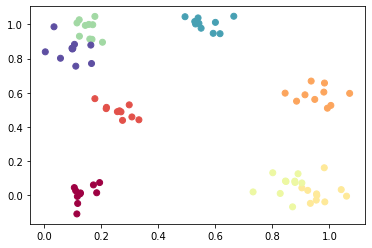

In [ ]:
n_clusters = 8
points_per_claster = 10
points, classes = make_blobs(n_clusters * points_per_claster, centers=n_clusters, center_box=(0, 1), cluster_std=0.05)

plt.scatter(points[:, 0], points[:, 1], c=classes, cmap='Spectral')
None

Обучу модель.

In [ ]:
som = SOM(1, 8, 2)
epochs = 100
history = som.fit(points, epochs, 0.6)

Отрисую историю положений узлов в процессе обучения.

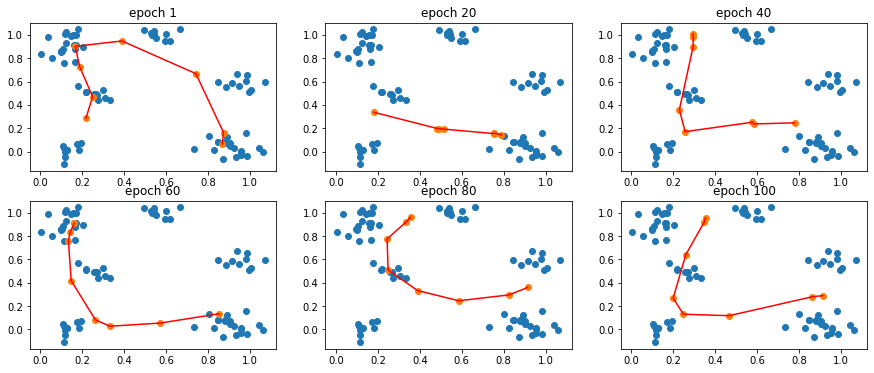

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 6))

ax[0,0].plot(history[1][:,:,0], history[1][:,:,1], c = 'red')
ax[0,0].scatter(points[:, 0], points[:, 1])
ax[0,0].scatter(history[1][:,:,0], history[1][:,:,1])
ax[0,0].set_title('epoch 1')
ax[0,1].plot(history[20][:,:,0], history[20][:,:,1], c = 'red')
ax[0,1].scatter(points[:, 0], points[:, 1])
ax[0,1].scatter(history[20][:,:,0], history[20][:,:,1])
ax[0,1].set_title('epoch 20')
ax[0,2].plot(history[40][:,:,0], history[40][:,:,1], c = 'red')
ax[0,2].scatter(points[:, 0], points[:, 1])
ax[0,2].scatter(history[40][:,:,0], history[40][:,:,1])
ax[0,2].set_title('epoch 40')
ax[1,0].plot(history[60][:,:,0], history[60][:,:,1], c = 'red')
ax[1,0].scatter(points[:, 0], points[:, 1])
ax[1,0].scatter(history[60][:,:,0], history[60][:,:,1])
ax[1,0].set_title('epoch 60')
ax[1,1].plot(history[80][:,:,0], history[80][:,:,1], c = 'red')
ax[1,1].scatter(points[:, 0], points[:, 1])
ax[1,1].scatter(history[80][:,:,0], history[80][:,:,1])
ax[1,1].set_title('epoch 80')
ax[1,2].plot(history[-1][:,:,0], history[-1][:,:,1], c = 'red')
ax[1,2].scatter(points[:, 0], points[:, 1])
ax[1,2].scatter(history[-1][:,:,0], history[-1][:,:,1])
ax[1,2].set_title('epoch 100')

plt.show()

Отрисую финальный результат.

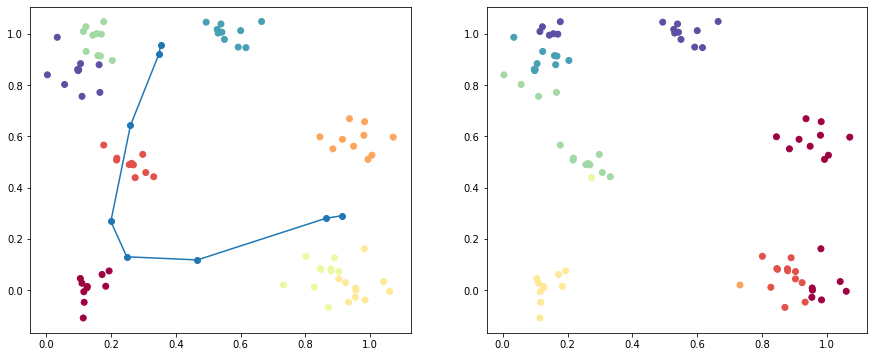

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].scatter(points[:, 0], points[:, 1], c=classes, cmap='Spectral')
ax[0].scatter(som.nodes[:,:,0], som.nodes[:,:,1])
ax[0].plot(som.nodes[:,:,0], som.nodes[:,:,1])

ax[1].scatter(points[:, 0], points[:, 1], c=som.predict(points), cmap='Spectral')
plt.show()

Проделаю аналогичные действия, но уже для двумерной сетки.

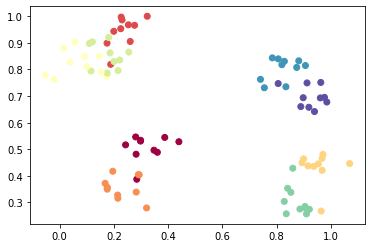

In [ ]:
n_clusters = 9
points_per_claster = 10
points, classes = make_blobs(n_clusters * points_per_claster, centers=n_clusters, center_box=(0, 1), cluster_std=0.05)

plt.scatter(points[:, 0], points[:, 1], c=classes, cmap='Spectral')
None

In [ ]:
som = SOM(3, 3, 2)
epochs = 100
history = som.fit(points, epochs, 0.8)

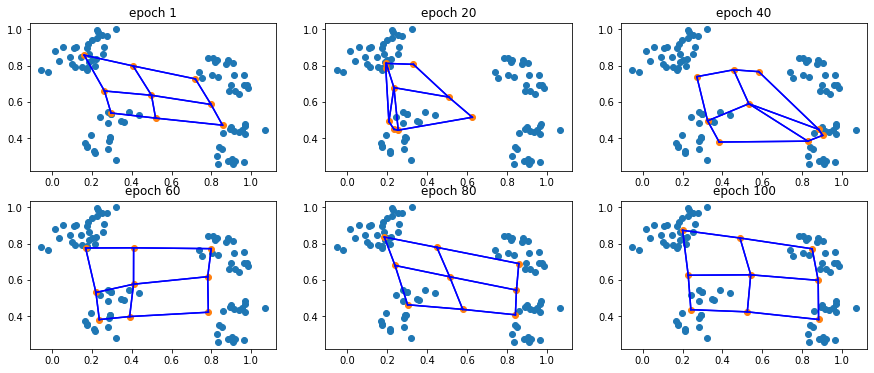

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 6))

def plot_grid(ax, nodes):
    for i in range(nodes.shape[0]):
        for j in range(nodes.shape[1]):
            if i > 0:
                ax.plot([nodes[i,j,0],nodes[i-1,j,0]], [nodes[i,j,1],nodes[i-1,j,1]], c='blue')
            if i < nodes.shape[0]-1:
                ax.plot([nodes[i,j,0],nodes[i+1,j,0]], [nodes[i,j,1],nodes[i+1,j,1]], c='blue')
            if j > 0:
                ax.plot([nodes[i,j,0],nodes[i,j-1,0]], [nodes[i,j,1],nodes[i,j-1,1]], c='blue')
            if j < nodes.shape[1]-1:
                ax.plot([nodes[i,j,0],nodes[i,j+1,0]], [nodes[i,j,1],nodes[i,j+1,1]], c='blue')
    ax.scatter(nodes[:,:,0], nodes[:,:,1])

ax[0,0].scatter(points[:, 0], points[:, 1])
plot_grid(ax[0,0], history[1])
ax[0,0].set_title('epoch 1')
ax[0,1].scatter(points[:, 0], points[:, 1])
plot_grid(ax[0,1], history[20])
ax[0,1].set_title('epoch 20')
ax[0,2].scatter(points[:, 0], points[:, 1])
plot_grid(ax[0,2], history[40])
ax[0,2].set_title('epoch 40')
ax[1,0].scatter(points[:, 0], points[:, 1])
plot_grid(ax[1,0], history[60])
ax[1,0].set_title('epoch 60')
ax[1,1].scatter(points[:, 0], points[:, 1])
plot_grid(ax[1,1], history[80])
ax[1,1].set_title('epoch 80')
ax[1,2].scatter(points[:, 0], points[:, 1])
plot_grid(ax[1,2], history[-1])
ax[1,2].set_title('epoch 100')

plt.show()

Отрисую результат.

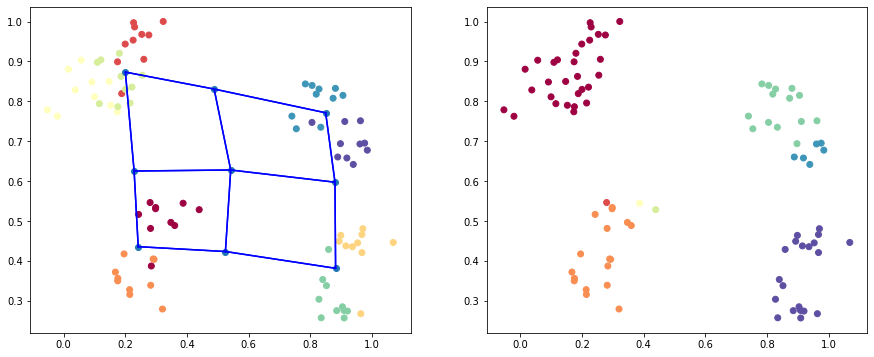

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].scatter(points[:, 0], points[:, 1], c=classes, cmap='Spectral')
for i in range(som.nodes.shape[0]):
    for j in range(som.nodes.shape[1]):
        if i > 0:
            ax[0].plot([som.nodes[i,j,0],som.nodes[i-1,j,0]], [som.nodes[i,j,1],som.nodes[i-1,j,1]], c='blue')
        if i < som.nodes.shape[0]-1:
            ax[0].plot([som.nodes[i,j,0],som.nodes[i+1,j,0]], [som.nodes[i,j,1],som.nodes[i+1,j,1]], c='blue')
        if j > 0:
            ax[0].plot([som.nodes[i,j,0],som.nodes[i,j-1,0]], [som.nodes[i,j,1],som.nodes[i,j-1,1]], c='blue')
        if j < som.nodes.shape[1]-1:
            ax[0].plot([som.nodes[i,j,0],som.nodes[i,j+1,0]], [som.nodes[i,j,1],som.nodes[i,j+1,1]], c='blue')

ax[0].scatter(som.nodes[:,:,0], som.nodes[:,:,1])

ax[1].scatter(points[:, 0], points[:, 1], c=som.predict(points), cmap='Spectral')
plt.show()

# Задача коммивояжёра

Сгенерирую случайно расположенные города, через которые требуется построить путь.

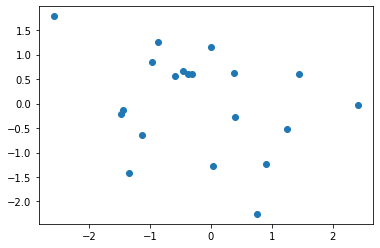

In [ ]:
points, _ = make_blobs(20, centers=1, center_box=(0, 0))

plt.scatter(points[:, 0], points[:, 1])
None

Обучу модель.

In [ ]:
som = SOM(1, len(points), 2)
epochs = 100
history = som.fit(points, epochs, 0.8)

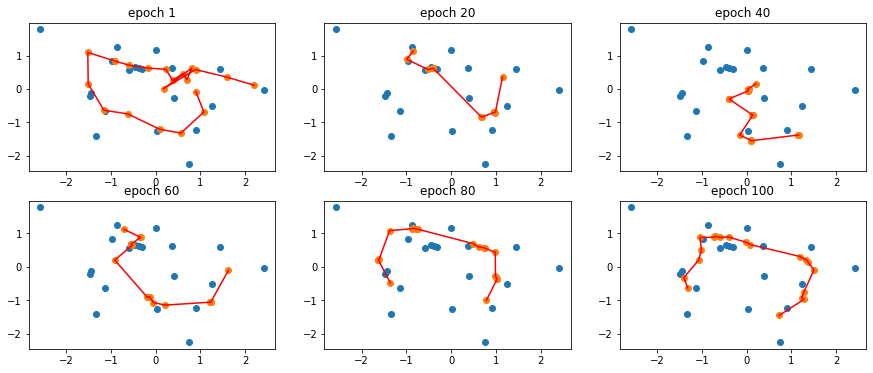

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 6))

ax[0,0].plot(history[1][:,:,0], history[1][:,:,1], c = 'red')
ax[0,0].scatter(points[:, 0], points[:, 1])
ax[0,0].scatter(history[1][:,:,0], history[1][:,:,1])
ax[0,0].set_title('epoch 1')
ax[0,1].plot(history[20][:,:,0], history[20][:,:,1], c = 'red')
ax[0,1].scatter(points[:, 0], points[:, 1])
ax[0,1].scatter(history[20][:,:,0], history[20][:,:,1])
ax[0,1].set_title('epoch 20')
ax[0,2].plot(history[40][:,:,0], history[40][:,:,1], c = 'red')
ax[0,2].scatter(points[:, 0], points[:, 1])
ax[0,2].scatter(history[40][:,:,0], history[40][:,:,1])
ax[0,2].set_title('epoch 40')
ax[1,0].plot(history[60][:,:,0], history[60][:,:,1], c = 'red')
ax[1,0].scatter(points[:, 0], points[:, 1])
ax[1,0].scatter(history[60][:,:,0], history[60][:,:,1])
ax[1,0].set_title('epoch 60')
ax[1,1].plot(history[80][:,:,0], history[80][:,:,1], c = 'red')
ax[1,1].scatter(points[:, 0], points[:, 1])
ax[1,1].scatter(history[80][:,:,0], history[80][:,:,1])
ax[1,1].set_title('epoch 80')
ax[1,2].plot(history[-1][:,:,0], history[-1][:,:,1], c = 'red')
ax[1,2].scatter(points[:, 0], points[:, 1])
ax[1,2].scatter(history[-1][:,:,0], history[-1][:,:,1])
ax[1,2].set_title('epoch 100')

plt.show()

In [ ]:
path = []
for i in range(len(som.nodes)):
    distances = np.sum((points-som.nodes[i,0])**2, axis=1)
    distances[path] = distances.max()+1
    path.append(np.argmin(distances))
path

[4, 17, 1, 19, 12, 3, 2, 14, 13, 8, 16, 18, 10, 11, 0, 9, 5, 6, 7, 15]

Отрисую построенный моделью путь.

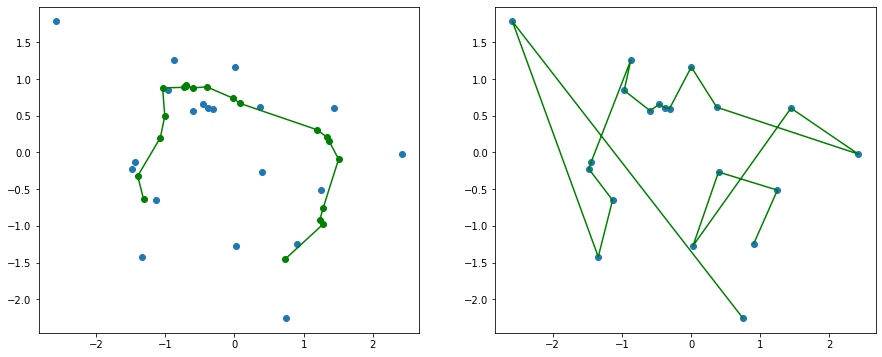

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].scatter(points[:, 0], points[:, 1])
ax[0].scatter(som.nodes[:, :, 0], som.nodes[:, :, 1], c = 'green')
ax[0].plot(som.nodes[:, :, 0], som.nodes[:, :, 1], c = 'green')

ax[1].plot(points[path, 0], points[path, 1], c='green')
ax[1].scatter(points[:, 0], points[:, 1])

plt.show()

# Кластеризация узлов по цветам.

Обучу модель на выборе из пяти цветов.

In [ ]:
w = 64
h = 48
data = np.array(((1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 1, 0), (0, 1, 1)))

som = SOM(w, h, 3)
epochs = 100
history = som.fit(data, epochs, 0.3)

Отрисую результат.

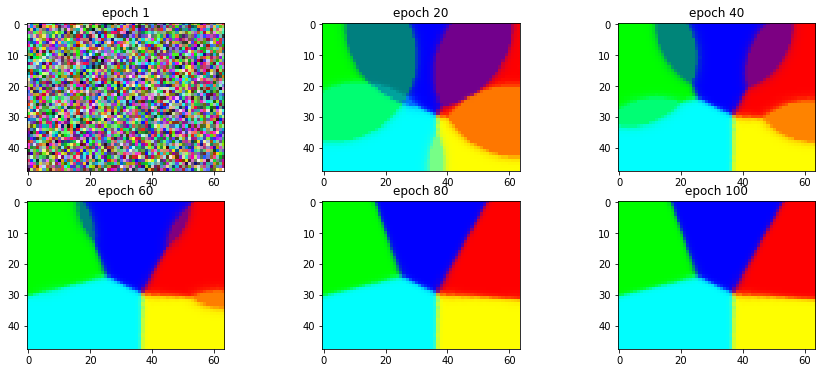

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 6))

ax[0,0].imshow(history[1])
ax[0,0].set_title('epoch 1')
ax[0,1].imshow(history[20])
ax[0,1].set_title('epoch 20')
ax[0,2].imshow(history[40])
ax[0,2].set_title('epoch 40')
ax[1,0].imshow(history[60])
ax[1,0].set_title('epoch 60')
ax[1,1].imshow(history[80])
ax[1,1].set_title('epoch 80')
ax[1,2].imshow(history[-1])
ax[1,2].set_title('epoch 100')

plt.show()

# Кластеризация цветов на изображении.

In [ ]:
def load_image(path, width=600, height=600):
    image = Image.open(path)
    image = image.convert('RGB')
    image = image.resize((width, height), Image.ANTIALIAS)
    image = np.asarray(image, dtype=np.float32)
    image /= 255
    return image

def pick_colors(image, number_of_picks):
    rng = np.random.default_rng()
    colors = rng.choice(image.reshape(-1, 3), number_of_picks, replace=False)
    return colors

Возьму выбору из тысячи случайных цветов на картинке.

In [ ]:
!pwd

/content


In [ ]:
image = load_image('image.jpg')
colors = pick_colors(image, 1000)

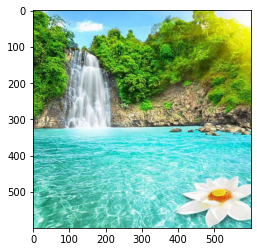

In [ ]:
plt.imshow(image)

In [ ]:
w = image.shape[1]
h = image.shape[0]

som = SOM(w, h, 3)
som.nodes = image.copy()
epochs = 100
history = som.fit(colors, epochs, 0.3, True)

Отрисую результат кластеризации.

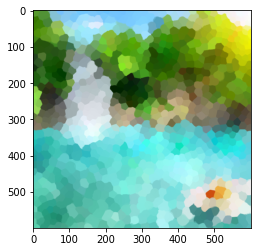

In [ ]:
plt.imshow(history[-1])

Отрисую историю преобразования сетки во время обучения.

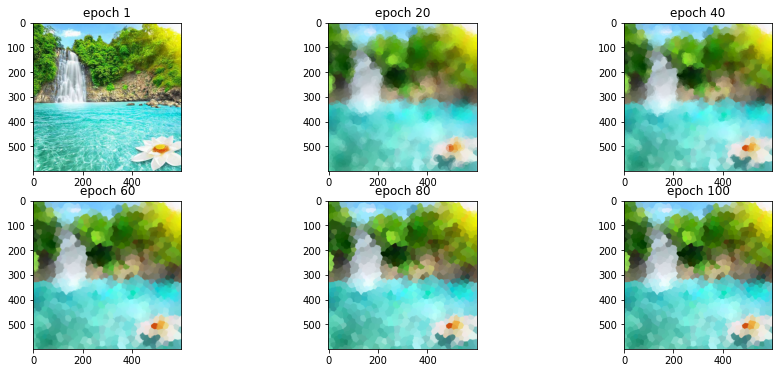

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 6))

ax[0,0].imshow(history[1])
ax[0,0].set_title('epoch 1')
ax[0,1].imshow(history[20])
ax[0,1].set_title('epoch 20')
ax[0,2].imshow(history[40])
ax[0,2].set_title('epoch 40')
ax[1,0].imshow(history[60])
ax[1,0].set_title('epoch 60')
ax[1,1].imshow(history[80])
ax[1,1].set_title('epoch 80')
ax[1,2].imshow(history[-1])
ax[1,2].set_title('epoch 100')

plt.show()

__Вывод__: В ходе выполнения лабораторной работы была реализована сеть Кохонена. Данная модель была применена для решения задачи кластеризации точек, задачи коммивояжёра и задачи кластеризации по признакам (цветовым векторам). В задаче кластеризации цветов значения узлов сетки образуют нечто очень похожее на диаграмму Вороново, что логично, так как влияние кластера тем сильнее, чем узел ближе. Где влияние кластеров оказывается одинаковым, образуется граница. А так как влияние зависит от расстояния, то образуется диаграмма Вороного. 